In [26]:
import numpy as np
import pandas as pd
import pyfredapi as pf
import os
from dotenv import load_dotenv

In [27]:
load_dotenv()
os.environ["FRED_API_KEY"] = str(os.getenv("API_KEY"))

Types of Data in FRED

In [28]:
pf.get_category_children(id=0)

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [29]:
pf.get_category_tags(category_id=0)

{'realtime_start': '2025-12-24',
 'realtime_end': '2025-12-24',
 'order_by': 'series_count',
 'sort_order': 'desc',
 'count': 0,
 'offset': 0,
 'limit': 1000,
 'tags': []}

In [30]:
data = pf.get_category_series(category_id=32348)
data

{'AAA': SeriesInfo(id='AAA', realtime_start='2025-12-24', realtime_end='2025-12-24', title="Moody's Seasoned Aaa Corporate Bond Yield", observation_start='1919-01-01', observation_end='2025-11-01', frequency='Monthly', frequency_short='M', units='Percent', units_short='%', seasonal_adjustment='Not Seasonally Adjusted', seasonal_adjustment_short='NSA', last_updated='2025-12-01 10:17:41-06', popularity=77, notes='These instruments are based on bonds with maturities 20 years and above. \n\n© 2017, Moody’s Corporation, Moody’s Investors Service, Inc., Moody’s Analytics, Inc. and/or their licensors and affiliates (collectively, “Moody’s”).  All rights reserved. Moody’s ratings and other information (“Moody’s Information”) are proprietary to Moody’s and/or its licensors and are protected by copyright and other intellectual property laws.  Moody’s Information is licensed to Client by Moody’s.  MOODY’S INFORMATION MAY NOT BE COPIED OR OTHERWISE REPRODUCED, REPACKAGED, FURTHER TRANSMITTED, TRAN

In [31]:
len(data.keys())

362

Get all data

In [32]:
df_unrate=pf.get_series(series_id="UNRATE")
df_pce= pf.get_series(series_id="PCE")
df_cpi =pf.get_series(series_id="CPIAUCSL")
df_fedfunds = pf.get_series(series_id="FEDFUNDS")
df_m2 =pf.get_series(series_id="M2SL")
df_wage_avg= pf.get_series(series_id="CES0500000003")


df_indpro= pf.get_series(series_id="INDPRO")
df_gdpdef= pf.get_series(series_id="GDPDEF")
df_csent= pf.get_series(series_id="UMCSENT")
df_crude= pf.get_series(series_id="DCOILWTICO")     #crude 
df_compi= pf.get_series(series_id="PPIACO")         #commodity price index 
df_labor= pf.get_series(series_id="CIVPART") 

In [33]:
df_list1=[df_unrate, df_pce, df_cpi, df_fedfunds, df_m2, df_wage_avg]
df_list2=[df_indpro, df_gdpdef, df_csent, df_crude, df_compi, df_labor]

names_strong = ['UNRATE','PCE','CPI','FEDFUNDS','M2','WAGE_AVG']
names_weak = ['INDPRO','GDPDEF','CSENT','CRUDE','COMPI','LABOR']
for df , name in zip(df_list1, names_strong):
    df.rename(columns={'value':name }, inplace=True)
    
for df , name in zip(df_list2, names_weak):
    df.rename(columns={'value':name }, inplace=True)

In [34]:
#drop the columns 
for df in df_list1:
    df.drop(columns={"realtime_start", "realtime_end"}, inplace=True)
   
for df in df_list2:
    df=df.drop(columns={"realtime_start", "realtime_end"}, inplace=True)

#calculate start date 
for i in range(len(df_list1)):
    print("Col {} starts from {}".format(list(df_list1[i].columns)[0], df_list1[i]['date'].min()) )

start_date = max( pd.to_datetime(df['date']).min() for df in df_list1 )

start_date2 = max( pd.to_datetime(df['date']).min() for df in df_list2 )
start_date= max(start_date, start_date2)
print(start_date)


Col date starts from 1948-01-01 00:00:00
Col date starts from 1959-01-01 00:00:00
Col date starts from 1947-01-01 00:00:00
Col date starts from 1954-07-01 00:00:00
Col date starts from 1959-01-01 00:00:00
Col date starts from 2006-03-01 00:00:00
2006-03-01 00:00:00


In [35]:
# filter on start_date
df_list1= [df[df['date']>=start_date] for df in df_list1]
df_list2= [df[df['date']>=start_date] for df in df_list2]


In [36]:
# frequency of different dfs
dfs_all = df_list1+ df_list2
frequency = [df['date'].iloc[1] - df['date'].iloc[0] for df in dfs_all]
print(frequency)
#index on date 
for i in range(len(dfs_all)):
    dfs_all[i].set_index('date', inplace=True)


[Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('91 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('1 days 00:00:00'), Timedelta('31 days 00:00:00'), Timedelta('31 days 00:00:00')]


In [37]:
rows= [df.shape[0] for df in dfs_all]
print(rows)

[237, 235, 237, 237, 237, 237, 237, 78, 237, 5164, 235, 237]


In [38]:
for i, df in enumerate(dfs_all):
    df_index = pd.to_datetime(df.index)  # ensure datetime
    diffs = df_index.to_series().diff().dropna()
    print(f"{i} - {df.columns[0]}: {diffs.value_counts()}")


0 - UNRATE: date
31 days    138
30 days     79
28 days     14
29 days      5
Name: count, dtype: int64
1 - PCE: date
31 days    137
30 days     78
28 days     14
29 days      5
Name: count, dtype: int64
2 - CPI: date
31 days    138
30 days     79
28 days     14
29 days      5
Name: count, dtype: int64
3 - FEDFUNDS: date
31 days    138
30 days     79
28 days     14
29 days      5
Name: count, dtype: int64
4 - M2: date
31 days    138
30 days     79
28 days     14
29 days      5
Name: count, dtype: int64
5 - WAGE_AVG: date
31 days    138
30 days     79
28 days     14
29 days      5
Name: count, dtype: int64
6 - INDPRO: date
31 days    138
30 days     79
28 days     14
29 days      5
Name: count, dtype: int64
7 - GDPDEF: date
92 days    38
91 days    25
90 days    14
Name: count, dtype: int64
8 - CSENT: date
31 days    138
30 days     79
28 days     14
29 days      5
Name: count, dtype: int64
9 - CRUDE: date
1 days    4130
3 days    1033
Name: count, dtype: int64
10 - COMPI: date
31 days  

In [39]:
# Find max of all starts, min of all ends
start = max(df.index.min() for df in dfs_all)
end   = min(df.index.max() for df in dfs_all)

all_months   = pd.date_range(start=start, end=end, freq='ME')  # month end

# Resample each DataFrame to monthly frequency
for i, df in enumerate(dfs_all):
    df.index = pd.to_datetime(df.index)  # ensure datetime index
    if df.index.freq is None:
        # Identify series type
        delta = df.index[1] - df.index[0]
        if delta <= pd.Timedelta(days=31):
            # Daily or monthly -> monthly mean
            df = df.resample('ME').mean()
        else:
            # Quarterly -> monthly forward-fill
            df = df.resample('ME').ffill()
    # 3. Reindex to exact common months
    dfs_all[i] = df.reindex(all_months)

In [40]:
for i, df in enumerate(dfs_all):
    df_index = pd.to_datetime(df.index)  # ensure datetime
    diffs = df_index.to_series().diff().dropna()
    print(f"{i} - {df.columns[0]}: {diffs.value_counts()}")

0 - UNRATE: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
1 - PCE: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
2 - CPI: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
3 - FEDFUNDS: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
4 - M2: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
5 - WAGE_AVG: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
6 - INDPRO: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
7 - GDPDEF: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
8 - CSENT: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
9 - CRUDE: 31 days    134
30 days     77
28 days     14
29 days      5
Name: count, dtype: int64
10 - COMPI: 31 days    134
3

In [41]:
rows= [df.shape[0] for df in dfs_all]
print(rows)

[231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231, 231]


In [42]:
for i, df in enumerate(dfs_all):
    na_count = df.isna().sum().sum()  # total missing values
    print(f"{i} - {df.columns[0]}: {na_count} missing values")

0 - UNRATE: 0 missing values
1 - PCE: 0 missing values
2 - CPI: 0 missing values
3 - FEDFUNDS: 0 missing values
4 - M2: 0 missing values
5 - WAGE_AVG: 0 missing values
6 - INDPRO: 0 missing values
7 - GDPDEF: 0 missing values
8 - CSENT: 0 missing values
9 - CRUDE: 0 missing values
10 - COMPI: 0 missing values
11 - LABOR: 0 missing values


In [45]:
df_all

,UNRATE,PCE,CPI,FEDFUNDS,M2,WAGE_AVG,INDPRO,GDPDEF,CSENT,CRUDE,COMPI,LABOR
2006-04-30,4.7,9191.6,200.700,4.79,6806.9,20.15,98.7618,83.882,87.4,69.443684,164.300,66.1
2006-05-31,4.6,9231.8,201.300,4.94,6813.7,20.13,98.7869,83.882,79.1,70.844091,165.800,66.1
2006-06-30,4.6,9259.6,201.800,4.99,6851.8,20.23,99.0997,83.882,84.9,70.950909,166.100,66.2
2006-07-31,4.7,9343.8,202.900,5.24,6893.6,20.29,99.0489,84.468,84.7,74.411053,166.800,66.1
2006-08-31,4.7,9342.2,203.800,5.25,6925.1,20.32,99.4836,84.468,82.0,73.043043,167.900,66.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,4.1,20519.8,319.775,4.33,21564.6,35.90,101.0993,127.577,64.7,71.533158,259.498,62.4
2025-03-31,4.2,20683.0,319.615,4.33,21636.7,36.02,101.0404,127.577,57.0,68.239048,258.525,62.5
2025-04-30,4.2,20746.4,320.321,4.33,21770.6,36.08,101.1279,128.248,52.2,63.536667,258.392,62.6
2025-05-31,4.2,20755.0,320.580,4.33,21827.5,36.23,100.9655,128.248,52.2,62.167619,258.678,62.4


In [43]:
df_all = pd.concat(dfs_all , axis=1)
print(df_all.shape)
print(df_all.describe())

(231, 12)
           UNRATE           PCE         CPI    FEDFUNDS            M2  \
count  231.000000    231.000000  231.000000  231.000000    231.000000   
mean     5.826840  13285.850649  247.320061    1.639524  13447.806926   
std      2.187607   3288.811962   32.838771    1.966715   4994.625632   
min      3.400000   9191.600000  200.700000    0.050000   6806.900000   
25%      4.100000  10527.450000  221.542500    0.120000   8876.900000   
50%      5.000000  12396.200000  237.761000    0.380000  12296.900000   
75%      7.500000  14750.300000  259.656500    2.490000  18480.250000   
max     14.800000  20868.400000  321.500000    5.330000  21942.500000   

         WAGE_AVG      INDPRO      GDPDEF       CSENT       CRUDE       COMPI  \
count  231.000000  231.000000  231.000000  231.000000  231.000000  231.000000   
mean    26.415887   98.641343  100.715377   79.040693   72.635067  205.346805   
std      4.488893    4.261418   12.380119   13.179074   21.447149   28.676511   
min     

Analysis

In [47]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

<Axes: >

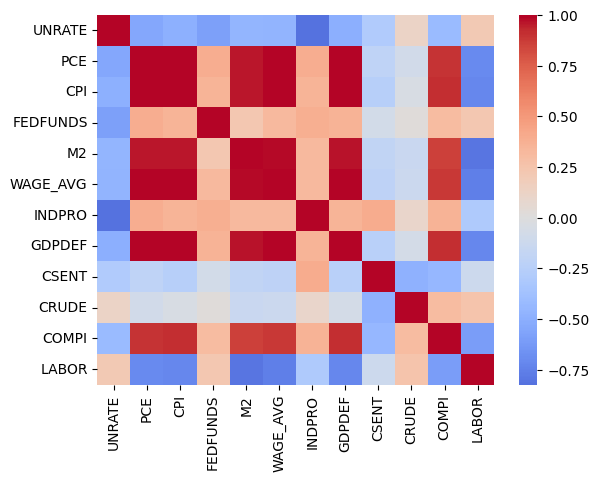

In [49]:
sns.heatmap(df_all.corr(), cmap="coolwarm", center=0)

Checking stationarity 

In [50]:
#Augmented Dickey-Fuller test
# p value 0.05

for col in df_all.columns:
    result = adfuller(df_all[col].dropna())
    print(col, result[1])  # p-value

UNRATE 0.09763457664049235
PCE 0.9990127478287094
CPI 0.9988967843779778
FEDFUNDS 0.10267605139395908
M2 0.964414214824624
WAGE_AVG 1.0
INDPRO 0.21908261051377897
GDPDEF 0.9927508017983065
CSENT 0.33094825836212893
CRUDE 0.013035944126999524
COMPI 0.7566750189944577
LABOR 0.38207733143623923


Generate Stationary data

In [51]:
# use differencing to stabilize the mean and variance for statistical tests

#log transform for stability
df_stationary= pd.DataFrame()
list_highval= [ 'PCE', 'M2', 'WAGE_AVG', 'INDPRO', 'CRUDE', 'COMPI'] #these have large differences to stablise it we log 

for col in df_all.columns:
    series = df_all[col].dropna()
    if col in list_highval:
        series= np.log(series)
    p_value= adfuller(series)[1]
    diff_count=0
    if p_value>0.05:
        series = series.diff().dropna()
        p_value= adfuller(series)[1]
        diff_count+=1
    print(f"{col}: stationary after {diff_count} differencing(s), p-value={p_value:.4f}")
    df_stationary[col] = series

UNRATE: stationary after 1 differencing(s), p-value=0.0000
PCE: stationary after 1 differencing(s), p-value=0.0000
CPI: stationary after 1 differencing(s), p-value=0.0000
FEDFUNDS: stationary after 1 differencing(s), p-value=0.0059
M2: stationary after 1 differencing(s), p-value=0.0007
WAGE_AVG: stationary after 1 differencing(s), p-value=0.0000
INDPRO: stationary after 1 differencing(s), p-value=0.0000
GDPDEF: stationary after 1 differencing(s), p-value=0.1873
CSENT: stationary after 1 differencing(s), p-value=0.0000
CRUDE: stationary after 0 differencing(s), p-value=0.0068
COMPI: stationary after 1 differencing(s), p-value=0.0000
LABOR: stationary after 1 differencing(s), p-value=0.0000


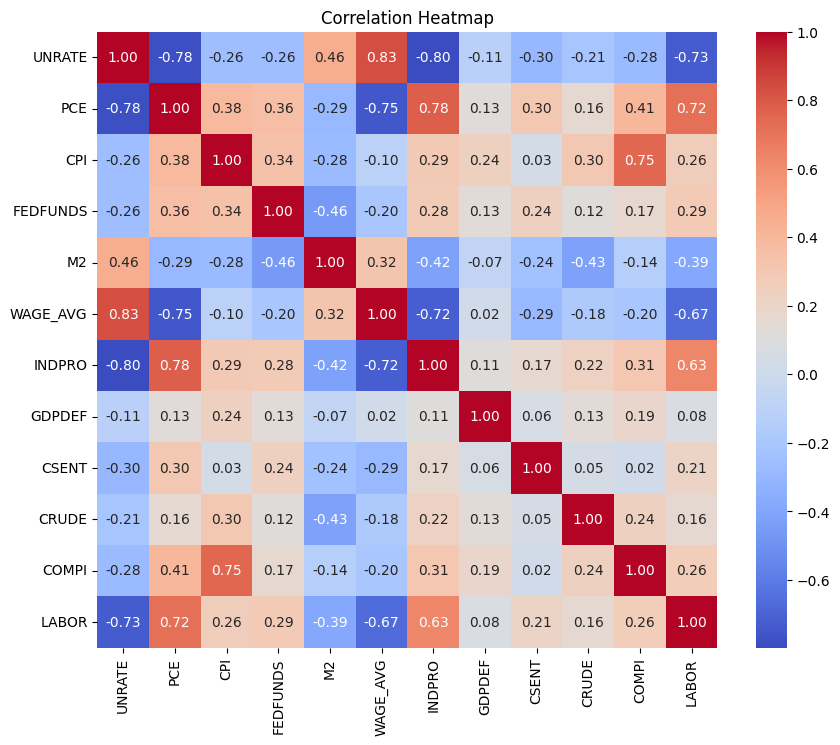

In [54]:
corr = df_stationary.corr()

# Plot heatmap after stationary data found 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

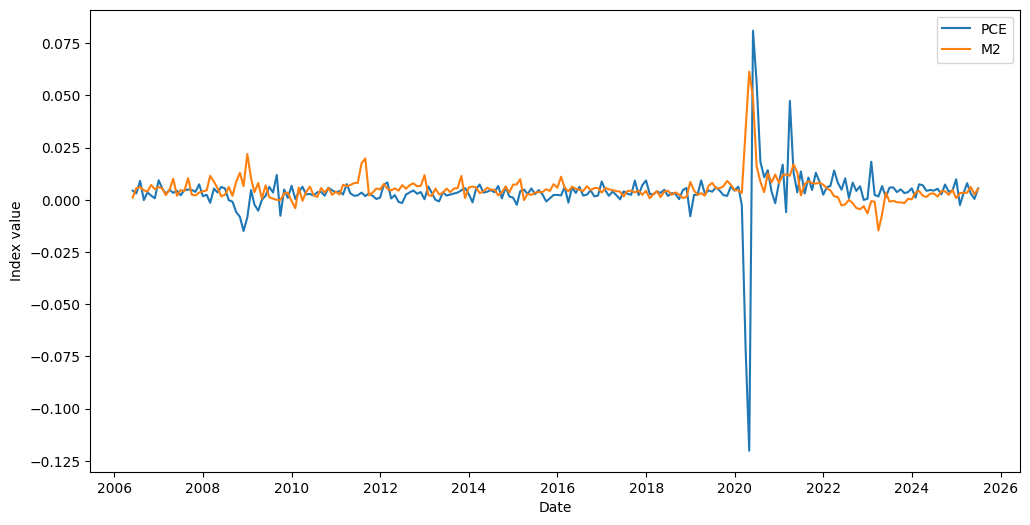

In [55]:
plt.figure(figsize=(12,6))

plt.plot(df_stationary.index, df_stationary['PCE'], label ='PCE' )

plt.plot(df_stationary.index, df_stationary['M2'], label='M2')
plt.xlabel('Date')
plt.ylabel('Index value')
plt.legend()
plt.show()

#it clearly shows the effects of massive money flushed into economy by USgov which is shown by M2 spike
#while personal consumption went down by a lot due to uncertainity in households and job losses 


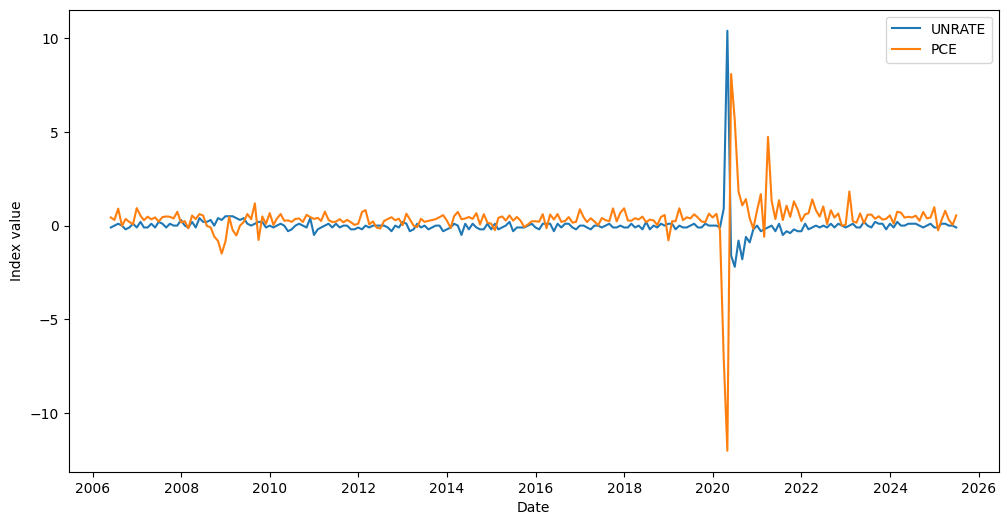

In [56]:
plt.figure(figsize=(12,6))
plt.plot(df_stationary.index, df_stationary['UNRATE'], label='UNRATE')
plt.plot(df_stationary.index, df_stationary['PCE']*100, label='PCE')# for scaling 


plt.xlabel('Date')
plt.ylabel('Index value')
plt.legend()
plt.show()

# Phillips curve is flattening meaning inflation changes don’t move unemployment as much 
#however we are unsure of how accurate the unemployment data is due to rise of gig economies where keeping track of employment is hard


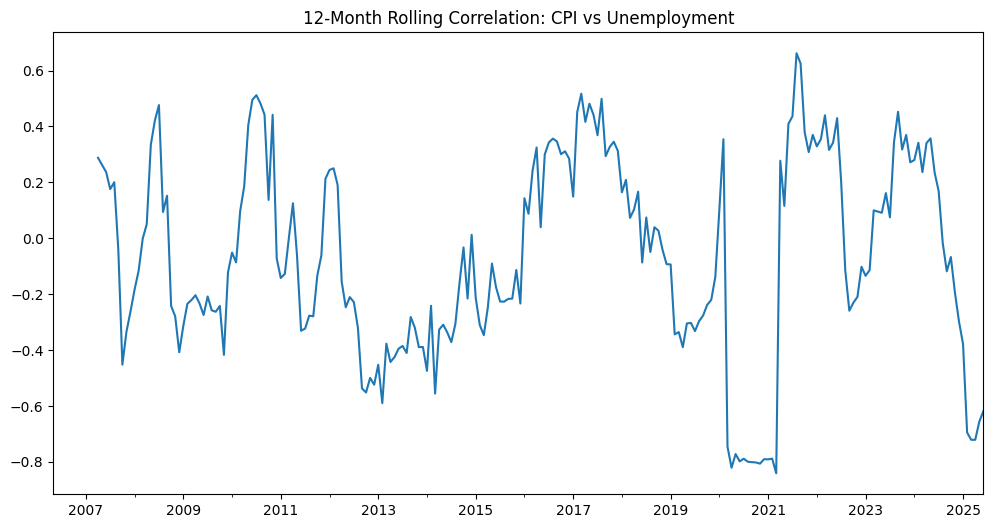

In [57]:
rolling_corr = df_stationary['CPI'].rolling(12).corr(df_stationary['UNRATE'])
rolling_corr.plot(figsize=(12,6))
plt.title('12-Month Rolling Correlation: CPI vs Unemployment')
plt.show()

Checking lagged correlation 

In [58]:

def plot_lagged_corr(x, y, max_lag=12, series_names=('X','Y')):
    """
    Computes and plots cross-correlation between two series for lags -max_lag to +max_lag.
    Prints the lag with the strongest correlation.
    
    Parameters:
        x, y: 1D arrays or pandas Series of same length
        max_lag: maximum number of periods to lag
        series_names: tuple with names for labeling
    """
    x = np.array(x)
    y = np.array(y)
    
    x= x- x.mean()
    y= y- y.mean()
    
    lags = range(-max_lag, max_lag+1)
    ccf_values = []

    for lag in lags:
        if lag < 0:
            corr = np.corrcoef(x[:lag], y[-lag:])[0,1] #x trails y 
        elif lag > 0:
            corr = np.corrcoef(x[lag:], y[:-lag])[0,1] # y trails x 
        else:
            corr = np.corrcoef(x, y)[0,1]
        ccf_values.append(corr)

    abs_ccf = np.abs(ccf_values)
    max_idx = np.argmax(abs_ccf)
    best_lag = lags[max_idx]
    best_corr = ccf_values[max_idx]
    
    print(f"Strongest correlation = {best_corr:.3f} at lag = {best_lag} months")

    
    plt.figure(figsize=(10,5))
    plt.bar(lags, ccf_values, color='skyblue')
    plt.xlabel('Lag (months)')
    plt.ylabel('Correlation')
    plt.title(f'Cross-correlation: {series_names[0]} vs {series_names[1]}')
    plt.axvline(best_lag, color='red', linestyle='--', label=f'Max corr at lag {best_lag}')
    plt.legend()
    plt.show()

    return ccf_values, lags

    

Strongest correlation = -0.262 at lag = 0 months


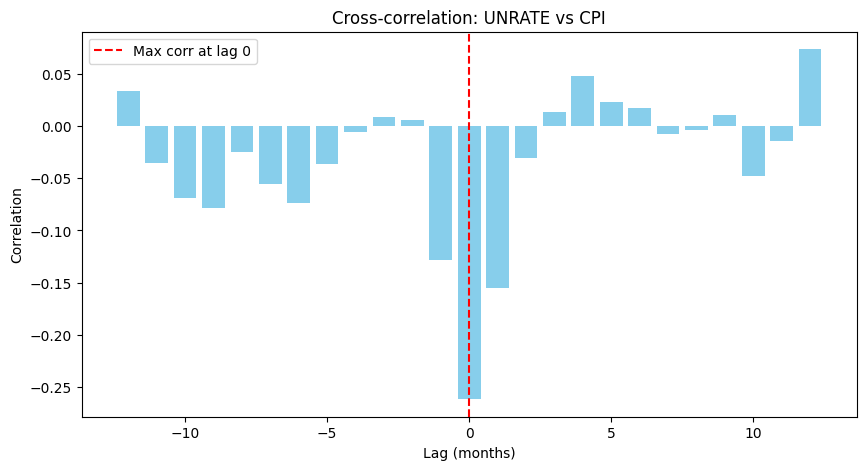

In [59]:
x = df_stationary['UNRATE']
y = df_stationary['CPI']

ccf_values, lags = plot_lagged_corr(x, y, max_lag=12, series_names=('UNRATE','CPI'))


M2 vs PCE 

Strongest correlation = -0.472 at lag = 1 months


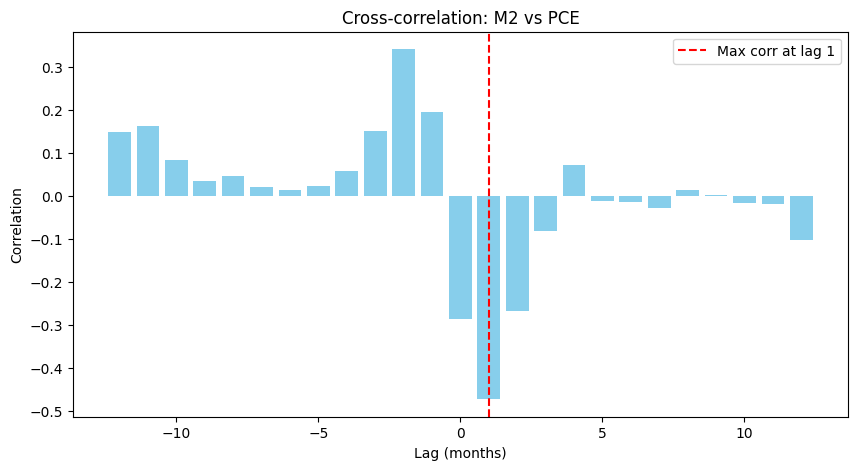

In [60]:
x = df_stationary['M2']
y = df_stationary['PCE']

ccf_values, lags = plot_lagged_corr(x, y, max_lag=12, series_names=('M2','PCE'))


Strongest correlation = -0.472 at lag = -1 months


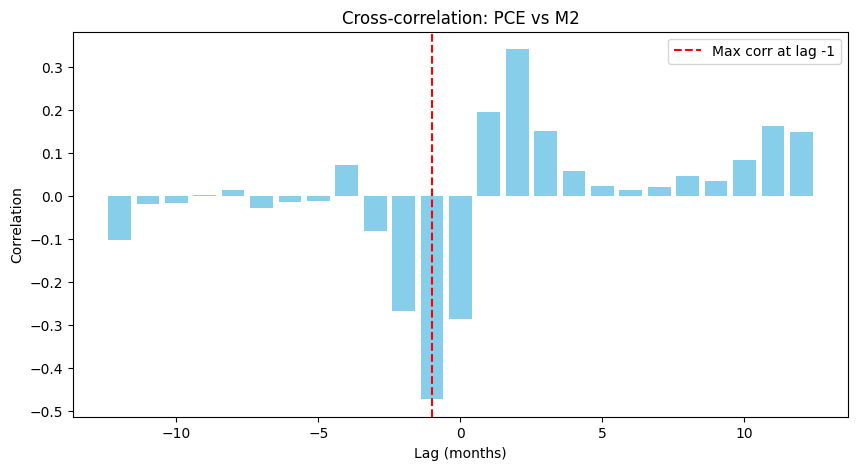

In [61]:
x = df_stationary['PCE']
y = df_stationary['M2']

ccf_values, lags = plot_lagged_corr(x, y, max_lag=12, series_names=('PCE','M2'))


#We can see both are mirror images too

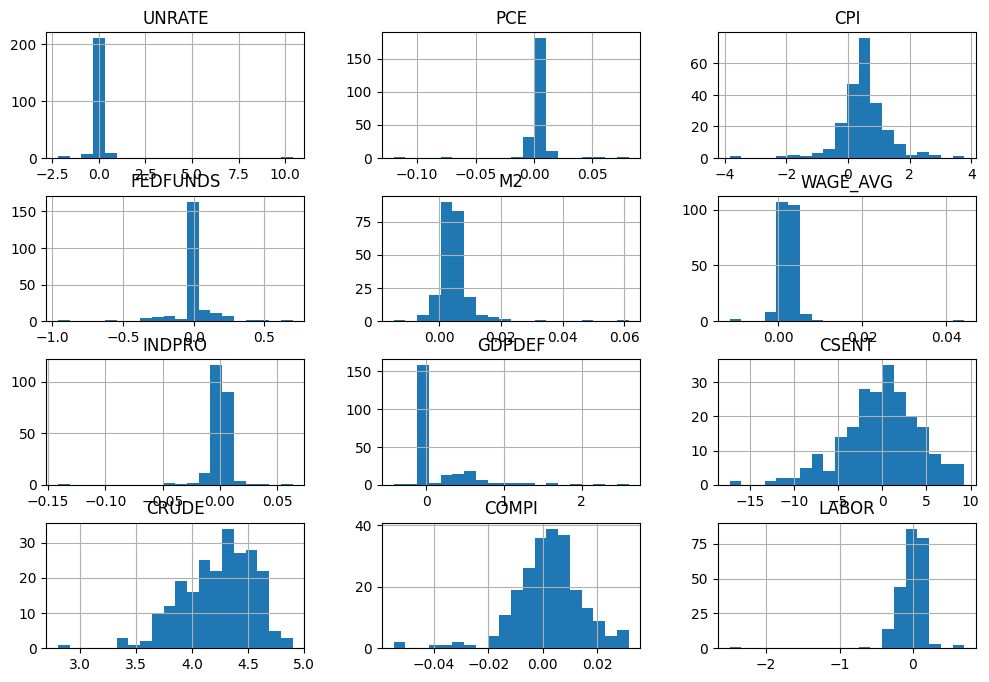

In [62]:
df_stationary.hist(bins=20, figsize=(12,8))
plt.show()

<Axes: title={'center': 'Commodity price index rolling volatility'}>

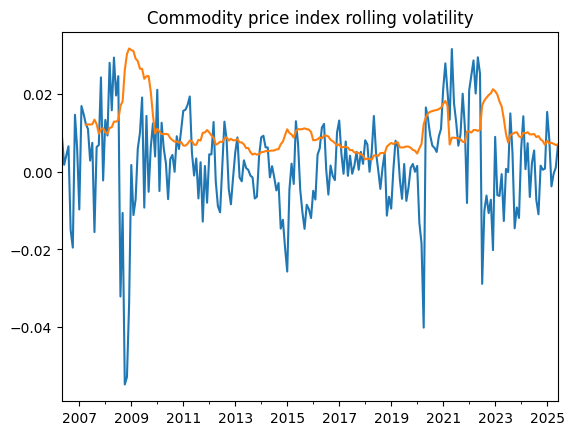

In [63]:
df_stationary['COMPI'].plot()
df_stationary['COMPI'].rolling(12).std().plot(title='Commodity price index rolling volatility')

Hypothesis Testing

Philips curve 

In [64]:
df_stationary['PCE'].mode()

0     -0.120135
1     -0.070928
2     -0.014951
3     -0.008503
4     -0.008169
         ...   
225    0.018192
226    0.018197
227    0.047329
228    0.056193
229    0.080911
Name: PCE, Length: 230, dtype: float64

Unemployment rate changes  granger causes PCE changes 

In [66]:
from statsmodels.tsa.stattools import grangercausalitytests
max_lag =12
results=grangercausalitytests(df_stationary[['PCE', 'UNRATE']], maxlag=max_lag, verbose=False)#is PCE dependent on UNRATE 
for lag in results:
    f_test = results[lag][0]['ssr_ftest']
    print(f"Lag {lag}: F = {f_test[0]:.4f}, p = {f_test[1]:.4f}")
#first some lags have most of predictive power 

Lag 1: F = 124.0444, p = 0.0000
Lag 2: F = 47.2533, p = 0.0000
Lag 3: F = 32.2952, p = 0.0000
Lag 4: F = 24.1732, p = 0.0000
Lag 5: F = 20.0310, p = 0.0000
Lag 6: F = 16.6983, p = 0.0000
Lag 7: F = 14.3211, p = 0.0000
Lag 8: F = 12.4989, p = 0.0000
Lag 9: F = 11.0975, p = 0.0000
Lag 10: F = 10.3964, p = 0.0000
Lag 11: F = 14.6219, p = 0.0000
Lag 12: F = 14.9589, p = 0.0000


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


M2 granger causes PCE 

In [67]:
df_stationary['PCE'].corr(df_stationary['M2'])

-0.28589469960039665

In [68]:
results=grangercausalitytests(df_stationary[['PCE', 'M2']], maxlag=max_lag, verbose=False)#is PCE dependednt on UNRATE 
for lag in results:
    f_test = results[lag][0]['ssr_ftest']
    print(f"Lag {lag}: F = {f_test[0]:.4f}, p = {f_test[1]:.4f}")

# for lag of 1 , 

Lag 1: F = 15.5598, p = 0.0001
Lag 2: F = 7.9562, p = 0.0005
Lag 3: F = 6.1572, p = 0.0005
Lag 4: F = 4.1431, p = 0.0030
Lag 5: F = 3.2821, p = 0.0071
Lag 6: F = 2.7921, p = 0.0124
Lag 7: F = 2.5729, p = 0.0146
Lag 8: F = 2.2593, p = 0.0247
Lag 9: F = 2.1100, p = 0.0302
Lag 10: F = 1.7804, p = 0.0662
Lag 11: F = 1.5991, p = 0.1013
Lag 12: F = 1.5276, p = 0.1169


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Unemployment granger causes CPI 

In [69]:
results=grangercausalitytests(df_stationary[['CPI', 'UNRATE']], maxlag=max_lag, verbose=False)#is cpi dependednt on UNRATE 
for lag in results:
    f_test = results[lag][0]['ssr_ftest']
    print(f"Lag {lag}: F = {f_test[0]:.4f}, p = {f_test[1]:.4f}")

#We couldnt disprove null hypothesis 


Lag 1: F = 0.1174, p = 0.7322
Lag 2: F = 0.6812, p = 0.5071
Lag 3: F = 0.5047, p = 0.6794
Lag 4: F = 0.4143, p = 0.7983
Lag 5: F = 0.3719, p = 0.8676
Lag 6: F = 0.3770, p = 0.8932
Lag 7: F = 0.3049, p = 0.9511
Lag 8: F = 0.3119, p = 0.9610
Lag 9: F = 0.4340, p = 0.9156
Lag 10: F = 0.3851, p = 0.9522
Lag 11: F = 0.3384, p = 0.9761
Lag 12: F = 0.3294, p = 0.9832


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [70]:
variables = ['UNRATE', 'PCE', 'CPI', 'FEDFUNDS', 'M2', 'WAGE_AVG', 'INDPRO',
       'GDPDEF', 'CSENT', 'CRUDE', 'COMPI', 'LABOR']
max_lag = 12

results_list = []

for target in variables:
    for predictor in variables:
        if target == predictor:
            continue
        try:
            test_data = df_stationary[[target, predictor]].dropna()
            test_result = grangercausalitytests(test_data, maxlag=max_lag, verbose=False)

            for lag in range(1, max_lag + 1):
                p_val = test_result[lag][0]['ssr_ftest'][1]
                results_list.append({
                    'target': target,
                    'predictor': predictor,
                    'lag': lag,
                    'p_value': p_val
                })

        except Exception as e:
            print(f"Error testing {predictor} => {target}: {e}")

# Convert to DataFrame
granger_df = pd.DataFrame(results_list)

# Filter to keep only significant results (e.g., p < 0.05)
significant = granger_df[granger_df['p_value'] < 0.05]

# Optional: get best (lowest p) lag per pair
best_per_pair = significant.groupby(['target', 'predictor']).apply(lambda g: g.loc[g['p_value'].idxmin()]).reset_index(drop=True)

# Save if needed
granger_df.to_csv('granger_all_results.csv', index=False)
best_per_pair.to_csv('granger_significant_summary.csv', index=False)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warni

Save the files

In [71]:
output_dir = "output_preprocess"

os.makedirs(output_dir, exist_ok=True)

df_stationary.to_csv(os.path.join(output_dir, "df_stationary_nonexog.csv"), index=True)
df_all.to_csv(os.path.join(output_dir, "df_all_nonexog.csv"), index=True)